In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
def plot_predictions(test, predicted):
  plt.plot(test, color='red', label='Real Bitcoin Price')
  plt.plot(predicted, color='blue', label='Predicted Bitcoin Price')
  plt.title("Cryptocurrency Price Prediction")
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

In [3]:
dataset = pd.read_csv('/content/btc_actual_price.csv', index_col='Date',parse_dates=['Date'])
dataset.tail(5)

,Nasdaq,S&P500,Japan,Euronext100,Gold,Silver,WTI ($/barrel),Brent Crude($/barrel),Bitcoin
Date,,,,,,,,,
2021-03-23,13227.70,3910.52,28995.92,1172.47,1724.7,25.200,57.75,59.96,54070.00000
2021-03-24,12961.89,3889.14,28405.52,1173.25,1732.9,25.201,61.12,63.70,54336.79983
2021-03-25,12977.68,3909.52,28729.88,1173.03,1724.9,25.022,58.47,61.21,52328.00000
2021-03-26,13138.72,3974.54,29176.70,1184.05,1732.2,25.092,60.93,63.77,51358.00000
2021-03-29,13059.65,3971.09,29384.52,1187.95,1712.1,24.747,61.49,64.06,55780.00000


## **Single Variate Bitcoin Price Prediction**

In [4]:
dataset.isnull().values.any()

False

In [5]:
print(dataset.shape)
dataset.shape

(978, 9)


(978, 9)

In [6]:
training_set = dataset[:'01-2021'].iloc[:,-1].values
test_set = dataset['01-2021':].iloc[:,-1].values
training_set.shape

(940,)

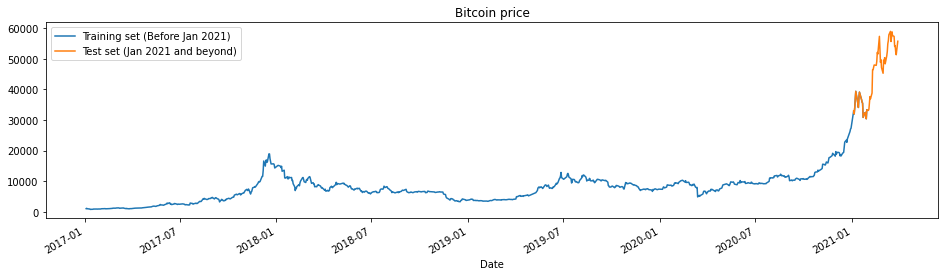

In [7]:
dataset["Bitcoin"][:'01-2021'].plot(figsize=(16,4),legend=True)
dataset["Bitcoin"]['01-2021':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before Jan 2021)','Test set (Jan 2021 and beyond)'])
plt.title('Bitcoin price')
plt.show()

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))

In [9]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 32 previous training set elements
X_train = []
y_train = []
training_set_scaled.shape

(940, 1)

In [10]:
for i in range(32,940):
  X_train.append(training_set_scaled[i-32:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [12]:
#RNN Architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
29/29 [==============================] - 7s 50ms/step - loss: 0.0110
Epoch 2/40
29/29 [==============================] - 1s 50ms/step - loss: 0.0032
Epoch 3/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0026
Epoch 4/40
29/29 [==============================] - 1s 47ms/step - loss: 0.0032
Epoch 5/40
29/29 [==============================] - 1s 46ms/step - loss: 0.0031
Epoch 6/40
29/29 [==============================] - 1s 47ms/step - loss: 0.0023
Epoch 7/40
29/29 [==============================] - 1s 47ms/step - loss: 0.0021
Epoch 8/40
29/29 [==============================] - 1s 49ms/step - loss: 0.0022
Epoch 9/40
29/29 [==============================] - 1s 47ms/step - loss: 0.0016
Epoch 10/40
29/29 [==============================] - 1s 47ms/step - loss: 0.0016
Epoch 11/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0016
Epoch 12/40
29/29 [==============================] - 1s 47ms/step - loss: 0.0016
Epoch 13/40
29/29 [==================

In [15]:
dataset_total = pd.concat((dataset["Bitcoin"][:'01-2021'], dataset['Bitcoin']['01-2021':]), axis=0)
input = dataset_total[len(dataset_total) - len(test_set) - 32:].values
input = input.reshape(-1,1)
inputs = sc.transform(input)

In [16]:
inputs.shape

(88, 1)

In [17]:
X_test = []
for i in range(32,88):
    X_test.append(inputs[i-32:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

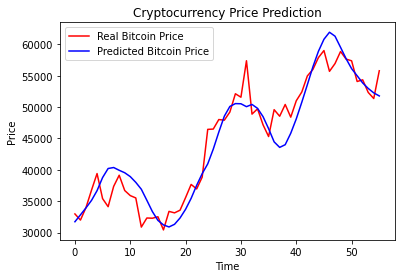

In [18]:
plot_predictions(test_set,predicted_stock_price)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('Test Mean Absolute Error:', round(mean_absolute_error(test_set, predicted_stock_price),3))
print('Test Root Mean Squared Error:',round(np.sqrt(mean_squared_error(test_set, predicted_stock_price)),3))
print('Test R2 Score:', round(r2_score(test_set, predicted_stock_price),3))

Test Mean Absolute Error: 2216.728
Test Root Mean Squared Error: 2874.231
Test R2 Score: 0.904


## **Single Variate Ethereum Price Prediction**

In [20]:
def plot_predictions2(test, predicted):
  plt.plot(test, color='red', label='Real Ethereum Price')
  plt.plot(predicted, color='blue', label='Predicted Ethereum Price')
  plt.title("Cryptocurrency Price Prediction")
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

In [21]:
dataset = pd.read_csv('/content/eth_actual_price.csv', index_col='Date',
                      parse_dates=['Date'])
dataset.tail(5)

,Nasdaq,S&P500,Japan,Euronext100,Gold,Silver,WTI ($/barrel),Brent Crude($/barrel),Ethereum
Date,,,,,,,,,
2021-03-23,13227.70,3910.52,28995.92,1172.47,1724.7,25.200,57.75,59.96,1682.0
2021-03-24,12961.89,3889.14,28405.52,1173.25,1732.9,25.201,61.12,63.70,1669.1
2021-03-25,12977.68,3909.52,28729.88,1173.03,1724.9,25.022,58.47,61.21,1585.8
2021-03-26,13138.72,3974.54,29176.70,1184.05,1732.2,25.092,60.93,63.77,1587.6
2021-03-29,13059.65,3971.09,29384.52,1187.95,1712.1,24.747,61.49,64.06,1687.2


In [22]:
dataset.isnull().values.any()

False

In [23]:
training_set = dataset[:'01-2021'].iloc[:,-1].values
test_set = dataset['01-2021':].iloc[:,-1].values
print(dataset.shape)
training_set.shape

(978, 9)


(940,)

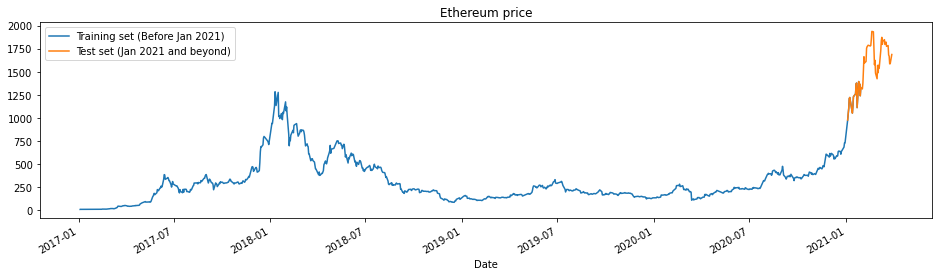

In [24]:
dataset["Ethereum"][:'01-2021'].plot(figsize=(16,4),legend=True)
dataset["Ethereum"]['01-2021':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before Jan 2021)','Test set (Jan 2021 and beyond)'])
plt.title('Ethereum price')
plt.show()

In [25]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))

In [26]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 32 previous training set elements
X_train = []
y_train = []
training_set_scaled.shape

(940, 1)

In [27]:
for i in range(32,940):
  X_train.append(training_set_scaled[i-32:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [29]:
#RNN Architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(X_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
29/29 [==============================] - 6s 48ms/step - loss: 0.0165
Epoch 2/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0067
Epoch 3/40
29/29 [==============================] - 1s 46ms/step - loss: 0.0049
Epoch 4/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0053
Epoch 5/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0036
Epoch 6/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0037
Epoch 7/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0031
Epoch 8/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0031
Epoch 9/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0031
Epoch 10/40
29/29 [==============================] - 1s 49ms/step - loss: 0.0031
Epoch 11/40
29/29 [==============================] - 1s 47ms/step - loss: 0.0029
Epoch 12/40
29/29 [==============================] - 1s 48ms/step - loss: 0.0030
Epoch 13/40
29/29 [==================

In [32]:
dataset_total = pd.concat((dataset["Ethereum"][:'01-2021'], dataset['Ethereum']['01-2021':]), axis=0)
input = dataset_total[len(dataset_total) - len(test_set) - 32:].values
input = input.reshape(-1,1)
inputs = sc.transform(input)

In [33]:
inputs.shape

(88, 1)

In [34]:
X_test = []
for i in range(32,88):
    X_test.append(inputs[i-32:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

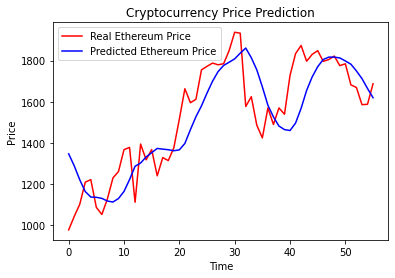

In [35]:
plot_predictions2(test_set,predicted_stock_price)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('Test Mean Absolute Error:', round(mean_absolute_error(test_set, predicted_stock_price),3))
print('Test Root Mean Squared Error:',round(np.sqrt(mean_squared_error(test_set, predicted_stock_price)),3))
print('Test R2 Score:', round(r2_score(test_set, predicted_stock_price),3))

Test Mean Absolute Error: 115.474
Test Root Mean Squared Error: 147.439
Test R2 Score: 0.689


## **Regressor Prediction**

Bitcoin Random Forest

In [37]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import pandas as pd
import numpy as np

In [38]:
dataset = pd.read_csv('/content/btc_actual_price.csv', index_col='Date',parse_dates=['Date'])
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X.shape, y.shape

((978, 8), (978,))

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = dataset.iloc[:940,:-1].values, dataset.iloc[940:,:-1].values, dataset.iloc[:940,-1].values, dataset.iloc[940:,-1].values

#Train classifier
# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                    

In [40]:
pred1_test = reg1.predict(X_test)
pred2_test = reg2.predict(X_test)
pred3_test = reg3.predict(X_test)
pred4_test = ereg.predict(X_test)

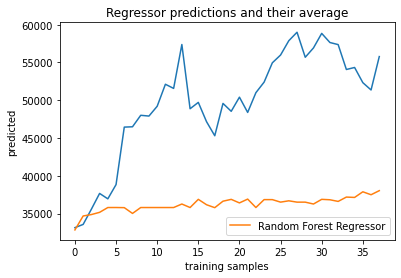

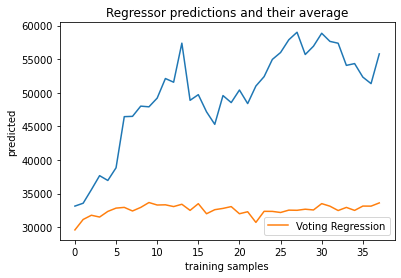

In [41]:
plt.plot(y_test)
plt.plot(pred2_test,label='Random Forest Regressor')
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()
plt.plot(y_test)
plt.plot(pred4_test, label='Voting Regression')
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

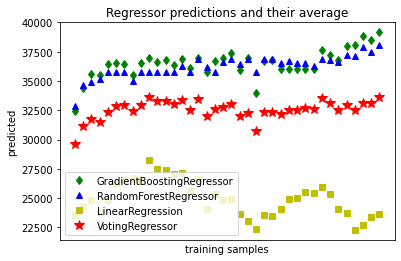

In [42]:
plt.figure()
plt.plot(pred1_test, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2_test, 'b^', label='RandomForestRegressor')
plt.plot(pred3_test, 'ys', label='LinearRegression')
plt.plot(pred4_test, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

Ethereuem Random Forest

In [43]:
dataset = pd.read_csv('/content/eth_actual_price.csv', index_col='Date',parse_dates=['Date'])
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X.shape, y.shape

((978, 8), (978,))

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = dataset.iloc[:940,:-1].values, dataset.iloc[940:,:-1].values, dataset.iloc[:940,-1].values, dataset.iloc[940:,-1].values

#Train classifier
# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                    

In [45]:
pred1_test = reg1.predict(X_test)
pred2_test = reg2.predict(X_test)
pred3_test = reg3.predict(X_test)
pred4_test = ereg.predict(X_test)

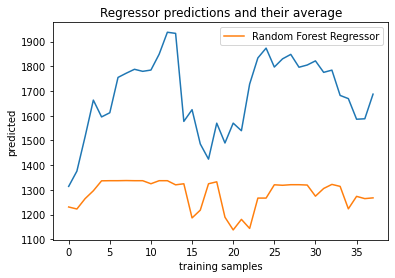

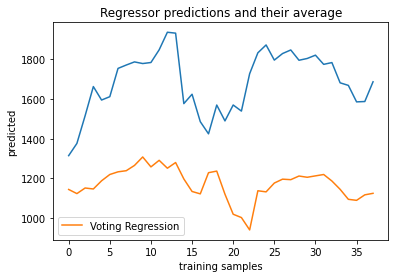

In [46]:
plt.plot(y_test)
plt.plot(pred2_test,label='Random Forest Regressor')
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()
plt.plot(y_test)
plt.plot(pred4_test, label='Voting Regression')
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

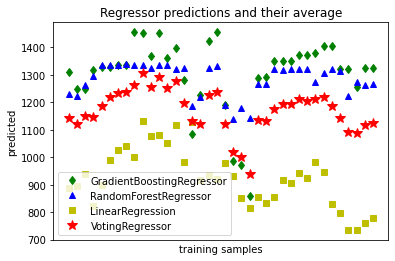

In [47]:
plt.figure()
plt.plot(pred1_test, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2_test, 'b^', label='RandomForestRegressor')
plt.plot(pred3_test, 'ys', label='LinearRegression')
plt.plot(pred4_test, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [48]:
print("Hellop")

Hellop
